In [1]:
import pandas as pd 
import numpy as np 
import networkx as nx 
import json 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime


import collections


In [2]:
G = nx.read_graphml('../data/clean/byuser.graphml',node_type=int)
print(len(G),len(G.edges))
for node in list(G.nodes)[:3]: print(G.nodes[node])
for node in list(G.edges)[:3]: print(G.edges[node])

8258 61366
{'province': 'PI', 'covidMeasure': 0, 'latitude': 43.85180773789867, 'longitude': 10.506207}
{'province': 'LU', 'covidMeasure': 0, 'latitude': 43.85135, 'longitude': 10.506207}
{'province': 'FI', 'covidMeasure': 0, 'latitude': 43.76973, 'longitude': 11.26562}
{'start': 414, 'end': 414, 'user': 'RobertaC2372', 'days': 0, 'geodistance': 0.0004577378986709846}
{'start': 414, 'end': 414, 'user': 'ClaudioC138', 'days': 0, 'geodistance': 0.0004577378986709846}
{'start': 414, 'end': 414, 'user': 'juan pablo A 116887066', 'days': 0, 'geodistance': 0.0004577378986709846}


In [3]:
df = pd.read_csv('../data/clean/covidars.csv',index_col='index')
df

,PI-positivi,PI-deceduti,PO-positivi,PO-deceduti,LI-positivi,LI-deceduti,FI-positivi,FI-deceduti,AR-positivi,AR-deceduti,PT-positivi,PT-deceduti,GR-positivi,GR-deceduti,MS-positivi,MS-deceduti,SI-positivi,SI-deceduti,LU-positivi,LU-deceduti
index,,,,,,,,,,,,,,,,,,,,
2020-02-14,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2020-02-15,0,0.0,0,0.0,0,0.0,1,0.0,0,0.0,1,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2020-02-16,0,0.0,0,0.0,0,0.0,2,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2020-02-17,0,0.0,0,0.0,0,0.0,1,0.0,0,0.0,1,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2020-02-18,0,0.0,0,0.0,0,0.0,7,0.0,0,0.0,1,0.0,0,0.0,0,0.0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-16,27396,648.0,20253,492.0,16411,391.0,61336,1938.0,20555,406.0,20922,541.0,7969,157.0,12460,510.0,12467,282.0,23227,617.0
2021-04-17,27467,651.0,20330,498.0,16438,391.0,61463,1951.0,20596,407.0,20996,544.0,7986,159.0,12491,512.0,12498,284.0,23253,619.0
2021-04-18,27535,652.0,20410,502.0,16480,392.0,61712,1955.0,20695,408.0,21094,559.0,8013,159.0,12538,513.0,12565,285.0,23323,622.0


In [4]:
provinceTags = ['PI','PO','LI','FI','AR','PT','GR','MS','SI','LU']
provinces = ['pisa','prato','livorno','florence','arezzo','pistoia','grosseto','massacarrara','siena','lucca']

In [7]:

for province in provinceTags:

    lagged = list(df[province+'-positivi'])
    lagged.insert(0,0)
    lagged.pop(-1)

    df[province+'-new_positivi'] = df[province+'-positivi'] - pd.Series(lagged,index=df.index) 

    
        
df

,PI-positivi,PI-deceduti,PO-positivi,PO-deceduti,LI-positivi,LI-deceduti,FI-positivi,FI-deceduti,AR-positivi,AR-deceduti,...,PI-new_positivi,PO-new_positivi,LI-new_positivi,FI-new_positivi,AR-new_positivi,PT-new_positivi,GR-new_positivi,MS-new_positivi,SI-new_positivi,LU-new_positivi
index,,,,,,,,,,,,,,,,,,,,,
2020-02-14,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2020-02-15,0,0.0,0,0.0,0,0.0,1,0.0,0,0.0,...,0,0,0,1,0,1,0,0,0,0
2020-02-16,0,0.0,0,0.0,0,0.0,2,0.0,0,0.0,...,0,0,0,1,0,-1,0,0,0,0
2020-02-17,0,0.0,0,0.0,0,0.0,1,0.0,0,0.0,...,0,0,0,-1,0,1,0,0,0,0
2020-02-18,0,0.0,0,0.0,0,0.0,7,0.0,0,0.0,...,0,0,0,6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-16,27396,648.0,20253,492.0,16411,391.0,61336,1938.0,20555,406.0,...,91,87,52,224,80,61,13,27,42,60
2021-04-17,27467,651.0,20330,498.0,16438,391.0,61463,1951.0,20596,407.0,...,71,77,27,127,41,74,17,31,31,26
2021-04-18,27535,652.0,20410,502.0,16480,392.0,61712,1955.0,20695,408.0,...,68,80,42,249,99,98,27,47,67,70


In [8]:
tickslocs = []
tickslabels = []
for i,e in enumerate(df.index):
    if i%48 == 0: 
        tickslocs.append(i)
        tickslabels.append(e)

tickslocs.append(i)
tickslabels.append(e)
tickslabels

['2020-02-14',
 '2020-04-02',
 '2020-05-20',
 '2020-07-07',
 '2020-08-24',
 '2020-10-11',
 '2020-11-28',
 '2021-01-15',
 '2021-03-04',
 '2021-04-20']

In [46]:
colors = ['brown','red','orange','yellow','green','blue','']

48.0

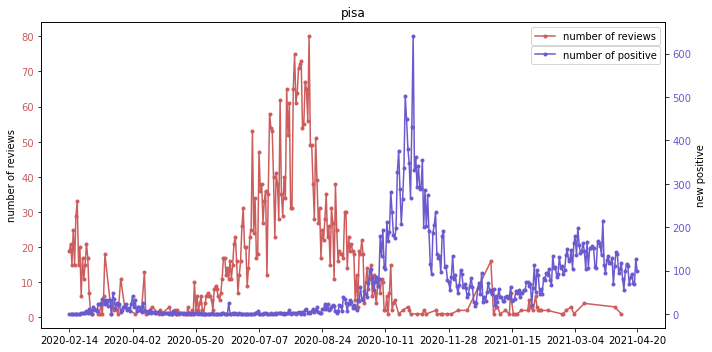

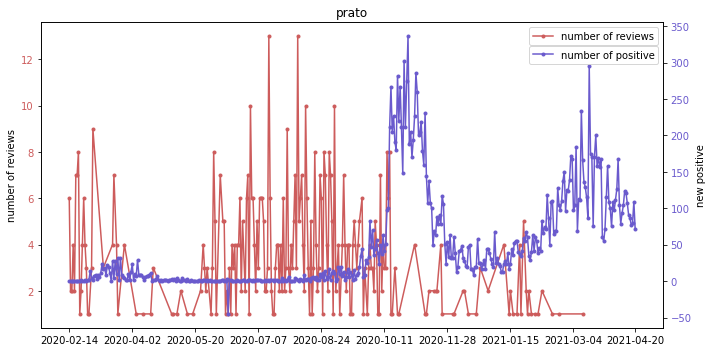

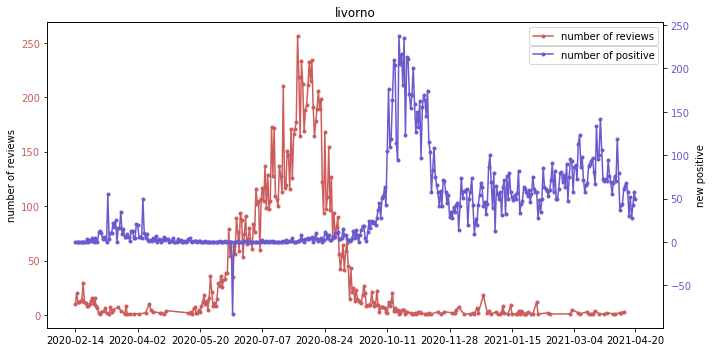

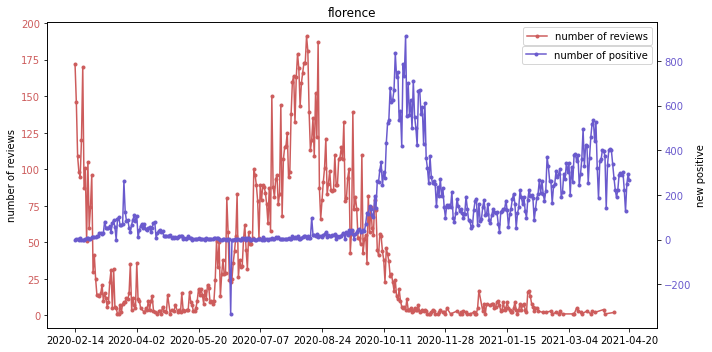

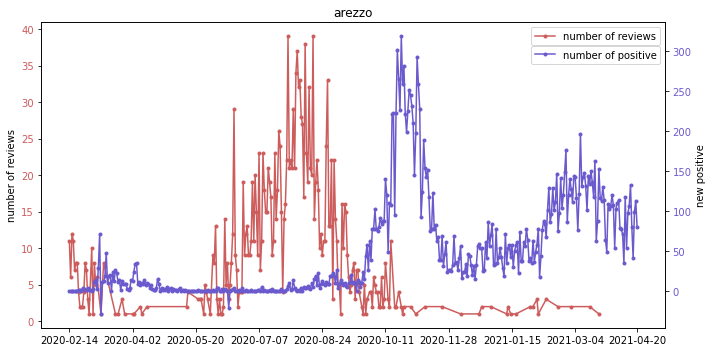

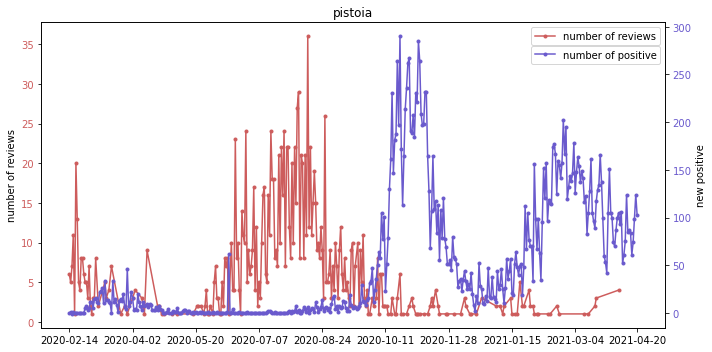

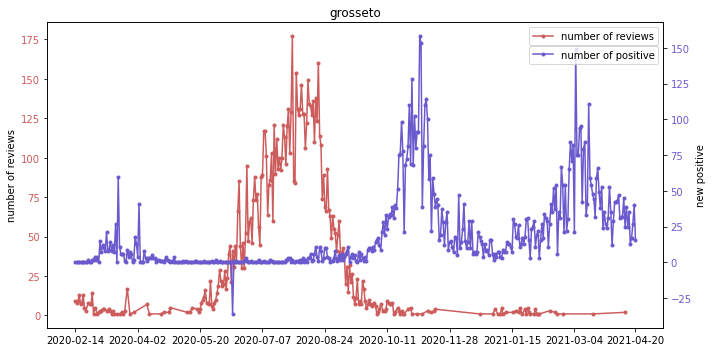

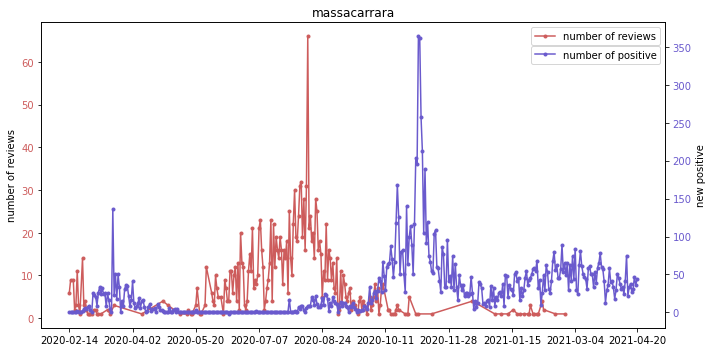

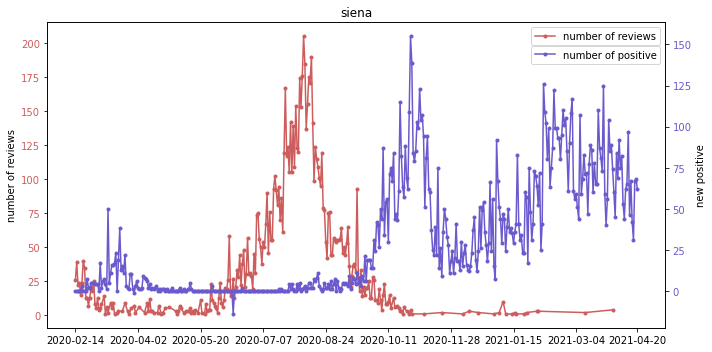

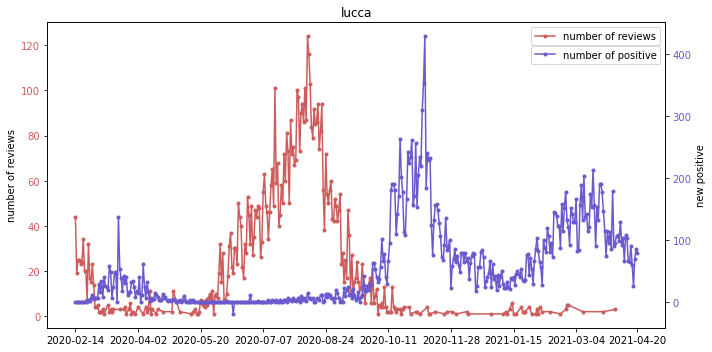

In [47]:

for i, province in enumerate(provinceTags):
    fig, ax1 = plt.subplots(figsize=(10,5))
    
    dates = [G.edges[(i,j,k)]['end'] for (i,j,k) in G.edges if G.nodes[j]['province'] == province ]
    
    dates_sequence = sorted(dates, reverse=True)  # degree sequence
    dateCount = collections.Counter(dates_sequence)
    
    deg, cnt = zip(*dateCount.items())
    
    c1 = 'indianred'
    c2= 'slateblue'
    ax1.plot(deg, cnt,  marker='.',  c=c1, label='number of reviews')
    ax1.set_ylabel('number of reviews')
    ax1.tick_params(axis='y', labelcolor=c1)
    plt.legend()
    
    ax2 = ax1.twinx()
    ax2.plot(df[province+'-'+'new_positivi'],c=c2,  marker='.' ,label='number of positive')
    ax2.set_ylabel('new positive')
    ax2.tick_params(axis='y', labelcolor=c2)
    
    plt.xticks(tickslocs, tickslabels)
    plt.legend(loc='upper right', bbox_to_anchor=(1, 0.94))
    plt.title(provinces[i])
    fig.tight_layout()
    plt.show()

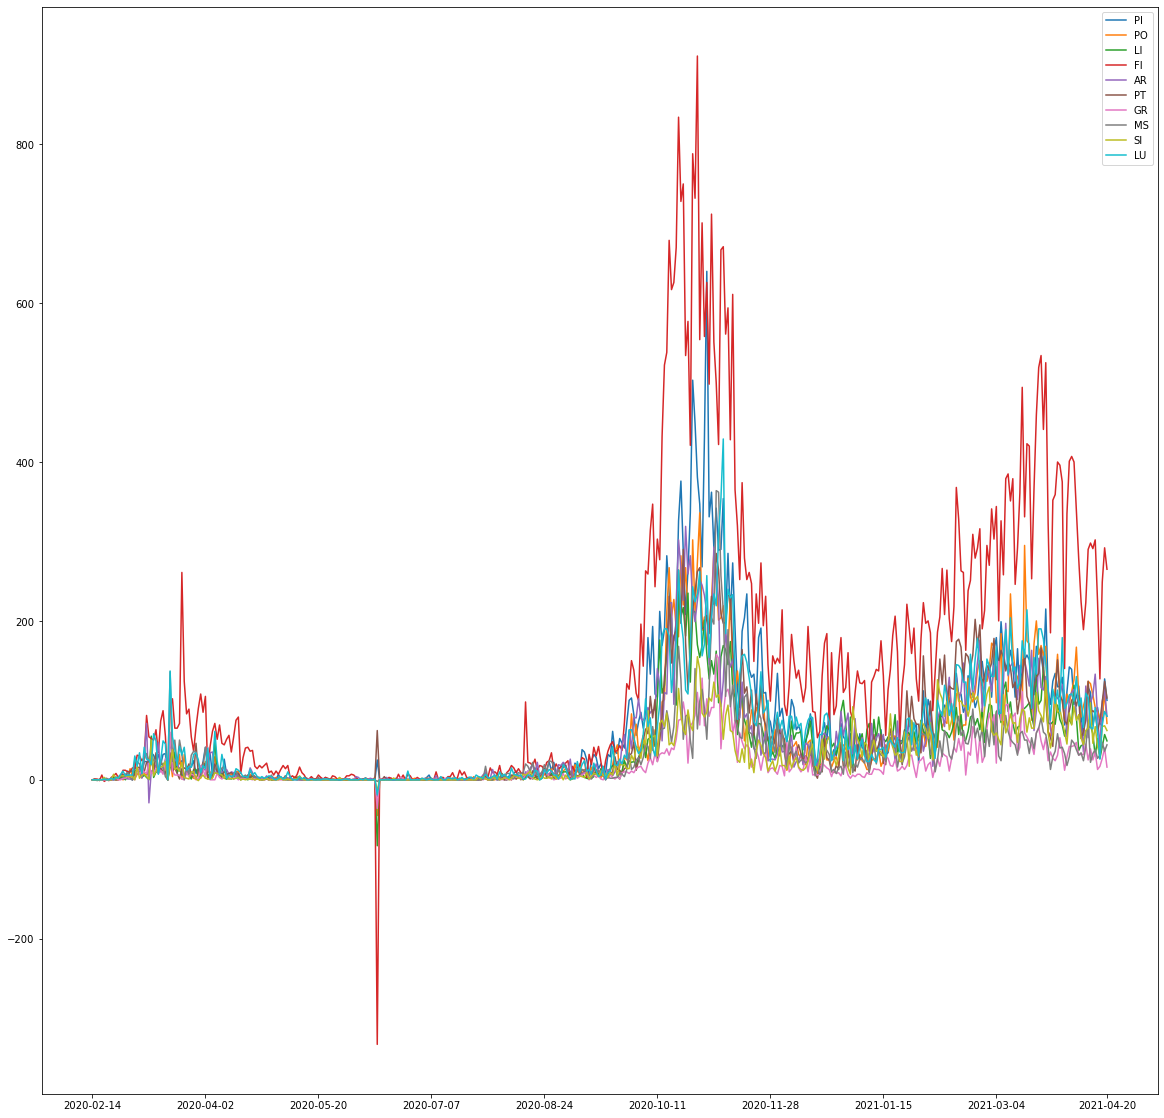

In [78]:
plt.figure(figsize=(20,20))
for p in provinceTags:
    plt.plot(df[p+'-'+'new_positivi'],label=p)
    plt.xticks(tickslocs, tickslabels)
    
plt.legend()

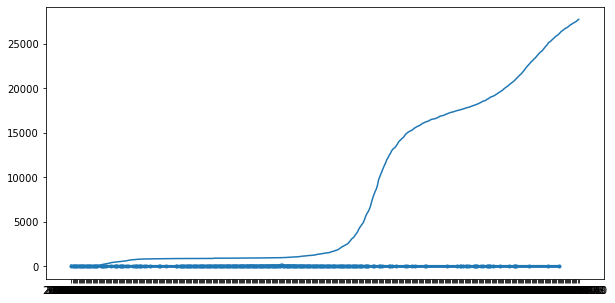

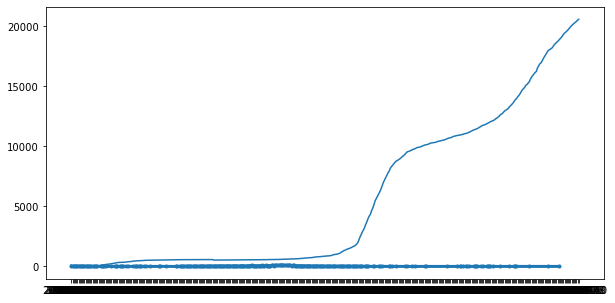

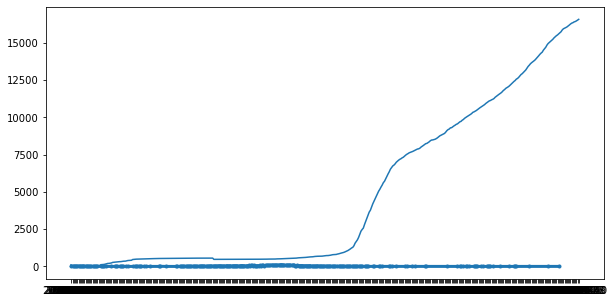

KeyboardInterrupt: 

In [34]:
provinceTags = ['PI','PO','LI','FI','AR','PT','GR','MS','SI','LU']
provinces = ['pisa','prato','livorno','florence','arezzo','pistoia','grosseto','massacarrara','siena','lucca']
import collections

for i, province in enumerate(provinceTags):
    
    fig, ax1 = plt.subplots(figsize=(10,5))
    
    ax1.plot(df[province+'-'+'positivi'],label=province,c='C'+str(0))
    dates_sequence = sorted(dates, reverse=True)  # degree sequence
    dateCount = collections.Counter(dates_sequence)
    deg, cnt = zip(*dateCount.items())
    ax1.plot(deg, cnt,  marker='.', lw=3)
    
    plt.show()

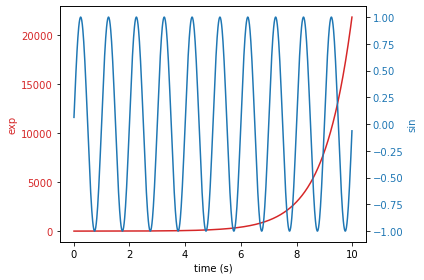

In [35]:
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()